In [70]:
import stan
import nest_asyncio
nest_asyncio.apply()
code = """
data {
  int<lower=0> N;   // number of data items
  int<lower=0> K;   // number of predictors
  matrix[N, K] x;   // predictor matrix
  vector[N] y;      // outcome vector
}
parameters {
  real alpha;           // intercept
  vector[K] beta;       // coefficients for predictors
  real<lower=0> sigma;  // error scale
}
model {
  y ~ normal(x * beta + alpha, sigma);  // likelihood
}
"""

In [71]:
import numpy as np
np.random.seed(22)
N = 100
K = 2
x = np.random.normal(0,1,(N,K))
β = np.random.normal(0,1,(K))
e = np.random.normal(0,1,(N))*0.01
y = np.dot(x,β)+e
data = {"N":N,"K":K,"x": x.tolist(),"y": y.tolist()}

import plotly.express as px
px.scatter(x=x[:,1],y=y).show()
px.scatter(x=x[:,0],y=y).show()

In [72]:
posterior = stan.build(code, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transi

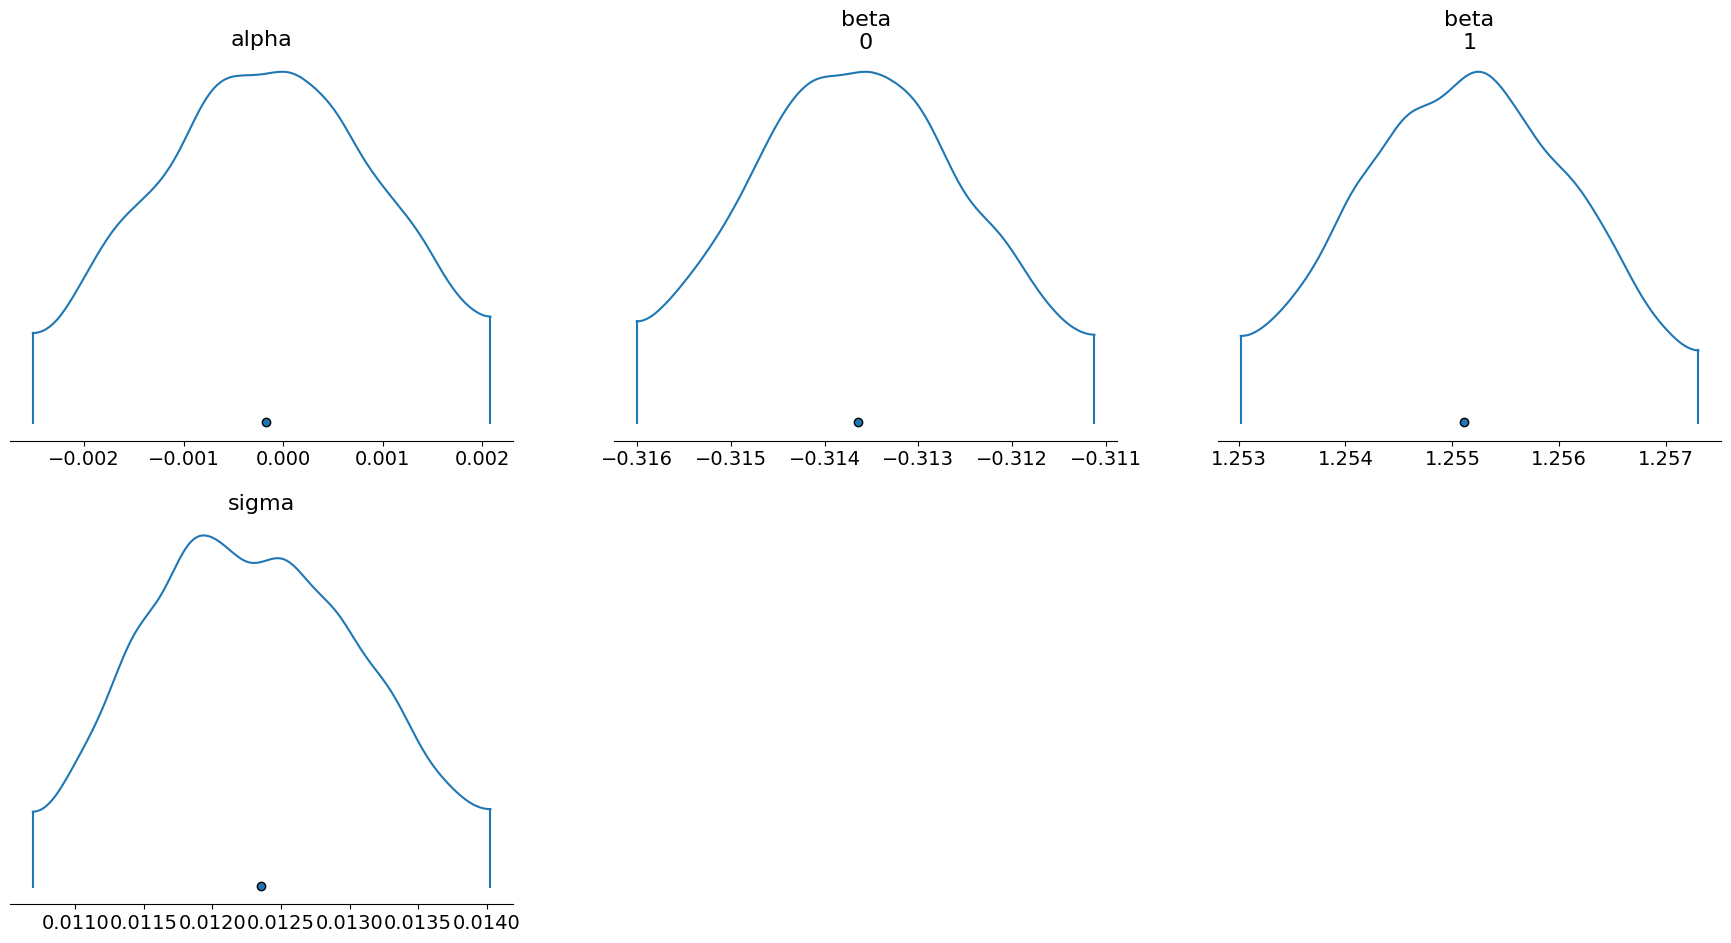

In [73]:
import arviz as az
az.plot_density(fit, var_names=["alpha", "beta", "sigma"]);

In [74]:
df = fit.to_frame()
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta.1,beta.2,sigma
draws,,,,,,,,,,,
0,387.105465,0.972599,0.273487,3.0,15.0,0.0,-385.579600,0.000330,-0.312453,1.255806,0.012296
1,386.294348,1.000000,0.327053,2.0,3.0,0.0,-385.473816,-0.000435,-0.315417,1.255640,0.011775
2,384.519613,0.895767,0.244684,2.0,3.0,0.0,-384.353739,0.000460,-0.313051,1.256816,0.010700
3,380.786357,0.796288,0.294018,2.0,3.0,0.0,-379.658686,0.001813,-0.313882,1.251242,0.011815
4,386.641282,0.961136,0.273487,2.0,7.0,0.0,-385.567721,0.001037,-0.315010,1.253894,0.012520
...,...,...,...,...,...,...,...,...,...,...,...
3995,386.257331,0.929072,0.294018,3.0,15.0,0.0,-383.752785,-0.000880,-0.312645,1.256721,0.011442
3996,386.385638,0.878853,0.273487,3.0,7.0,0.0,-385.760882,0.001203,-0.314720,1.255413,0.011451
3997,387.343938,0.671828,0.327053,4.0,15.0,0.0,-383.013156,0.000059,-0.312929,1.255602,0.011590


In [83]:
xx = np.linspace(-1,1,100)
px.line(x = xx, y = df['alpha'].mean() + df['beta.2'].mean() * xx)
a = df['alpha']
b = df['beta.1']
for i in range(0,len(a),400):
    px.line(x = xx, y = a[i] + b[i]*xx)

px.show()

AttributeError: module 'plotly.express' has no attribute 'show'